In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
df = pd.read_csv('airbnb_2.csv')
print(df.head())
print('Shape: ',df.shape,'\n',df.columns)

     id                                              name  host_id   
0  2539                Clean & quiet apt home by the park     2787  \
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude   
0         John            Brooklyn    Kensington  40.64749  -73.97237  \
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review   
0     Private room    149               1                  9  19

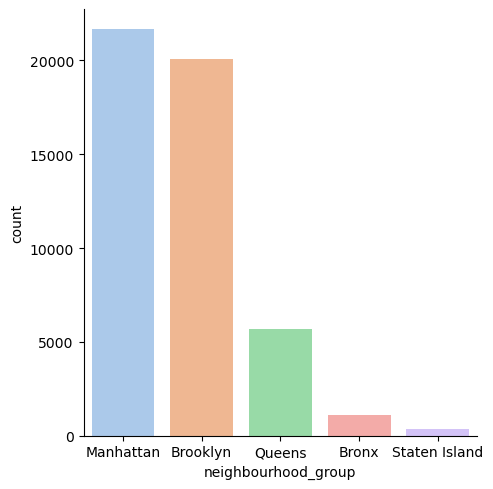

In [31]:
# Exploring the data and neighbourhood groups
sns.catplot(data=df,kind='count',x='neighbourhood_group', palette=colors, \
            order=['Manhattan','Brooklyn','Queens','Bronx','Staten Island'])
plt.show()

neighbourhood_group
Bronx            0.022313
Brooklyn         0.411167
Manhattan        0.443011
Queens           0.115881
Staten Island    0.007629
Name: id, dtype: float64


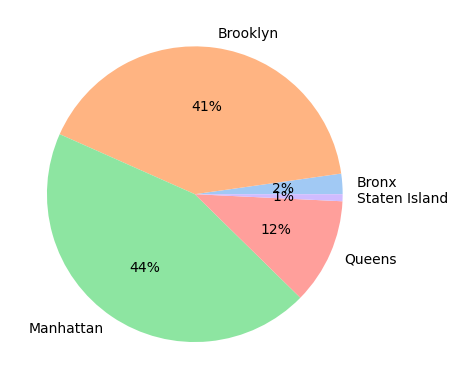

In [32]:
# Identify the distribution of listings among the neighbourhood groups
percent_listings = df.groupby('neighbourhood_group')['id'].count()/df['id'].count()
print(percent_listings)
colors = sns.color_palette('pastel')[0:5]
plt.pie(percent_listings, labels=percent_listings.index, colors=colors, autopct='%.0f%%')
plt.show()

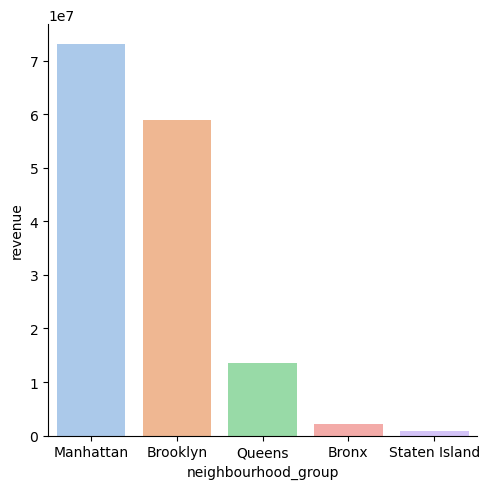

In [29]:
# Create a new field to look at revenue
df['revenue'] = df.price * df.number_of_reviews

# Display the total revenue by neighbourhood group
neighbourhood_revenue = df.groupby('neighbourhood_group')['revenue'].sum().reset_index()

sns.catplot(data=neighbourhood_revenue,x='neighbourhood_group',y='revenue',kind='bar',\
            order=['Manhattan','Brooklyn','Queens','Bronx','Staten Island'],palette=colors)
plt.show()

In [8]:
# Identify the top 3 neighbourhoods in the top 3 neighbourhood groups by revenue

# Total revenue by neighbourhood_group
neighbourhood_group_rev = df.groupby('neighbourhood_group')['revenue'].sum().reset_index()

# Total revenue by neighbourhood_group and neighbourhood
neighbourhood_by_group = df.groupby(['neighbourhood_group','neighbourhood'])['revenue'].sum().reset_index()

top_neighbourhood_group = (
    neighbourhood_group_rev # Take the 3 highest revenues from neighbourhood_group
    .nlargest(3,'revenue')
    ['neighbourhood_group']
    .tolist() # Convert to a list to filter from later
)

top_neighbourhood = (
    # Filter to keep only neighbourhoods that are in the top 3 neighbourhood groups
    neighbourhood_by_group[neighbourhood_by_group['neighbourhood_group'].isin(top_neighbourhood_group)]
    .groupby('neighbourhood_group')
    # Use the apply funciton to map .nlargest() to a column since it is a series
    .apply(lambda x: x.nlargest(3,'revenue'))
    .reset_index(drop=True)
)
print(top_neighbourhood)

  neighbourhood_group       neighbourhood   revenue
0            Brooklyn        Williamsburg  12389011
1            Brooklyn  Bedford-Stuyvesant  12352457
2            Brooklyn            Bushwick   4762224
3           Manhattan              Harlem   8598692
4           Manhattan      Hell's Kitchen   8238991
5           Manhattan        East Village   7574535
6              Queens             Astoria   1880840
7              Queens    Long Island City   1374945
8              Queens            Flushing   1140450


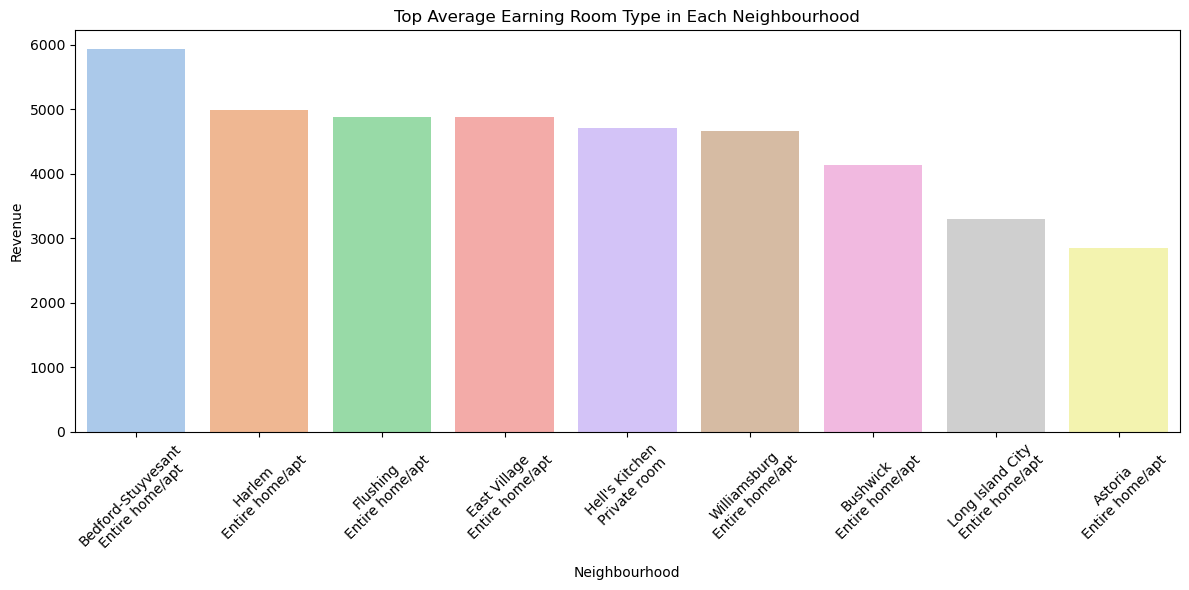

In [30]:
# Identify the room type in each of the top neighbourhoods that has the highest average revenue

# Create a revenue column for ease of use
# df['revenue'] = df.price*df.number_of_reviews

# Create a quick list of the top 3 neighbourhoods in the top 3 neighbourhood groups
# Can also be accomplished with: list_neighbourhoods= top_neighbourhood['neighbourhood'].tolist(),
# however, list of neighbourhoods is written explicitly here for convenience and readability.
list_neighbourhoods = ['Williamsburg', 'Bedford-Stuyvesant', 'Bushwick', 'Harlem', "Hell's Kitchen", 'East Village', 'Astoria', 'Long Island City', 'Flushing']

# Create subset of neighbourhoods we want
in_neighbourhoods = df[df['neighbourhood'].isin(list_neighbourhoods)]


top_room_type = (
    in_neighbourhoods
    .groupby(['neighbourhood','room_type'])['revenue'] # by each neighbourhood, aggregate the revenue column
    .mean()# find average revenue 
    .reset_index() # reset the index to cast as a dataframe instead of a series
    .sort_values(['neighbourhood','revenue'],ascending=[True,False]) # sort alphabetically then by most revenue
    .groupby('neighbourhood') # again group by neighbourhood
    .head(1) # select the 1st room type for each neighbourhood
    .reset_index(drop=True) # reset index to cast back to a dataframe
)

# sort by revenue
top_room_type = top_room_type.sort_values('revenue',ascending=False)


# Optional graph sizing/coloring
plt.figure(figsize=(12, 6))
colors = sns.color_palette('pastel')[0:9]

# Create the plot
ax = sns.barplot(data=top_room_type, x='neighbourhood', y='revenue',palette=colors)

# Labels
plt.xlabel('Neighbourhood')
plt.ylabel('Revenue')
plt.title('Top Average Earning Room Type in Each Neighbourhood')

# Rotate the x axis labels for legibility
plt.xticks(rotation=45)

neighbourhood_room_labels = zip(top_room_type['neighbourhood'], top_room_type['room_type'])

# Add and set labels using an f string and zip() to iterate through both columns in parallel
x_labels = [f"{neighbourhood}\n{room_type}" for neighbourhood, room_type in neighbourhood_room_labels ]
ax.set_xticklabels(x_labels)

# tight layout used so there are margins
plt.tight_layout()
plt.show()